# Práctica 7 análisis de regresión simple en nóminas


In [1]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importamos dataframe
df = pd.read_csv("comprar_alquilar.csv")
#Vemos los primeros 20 regustros
df.head(5)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [3]:
df.columns


Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

In [4]:
#Vemos que tipos de datos tiene cada columna
df.dtypes

ingresos          int64
gastos_comunes    int64
pago_coche        int64
gastos_otros      int64
ahorros           int64
vivienda          int64
estado_civil      int64
hijos             int64
trabajo           int64
comprar           int64
dtype: object

# Definimos quién es X y quién y

El objetivo general aquí es crear un modelo que prediga los ahorros de una persona dependiendo sus ingresos. En primer lugar, crearemos un modelo utilizando el conjunto de entrenamiento (70% del conjunto de datos). Luego se ajustará a una línea que se aproxime lo más posible a la mayoría de los puntos de datos.

In [5]:
X = df.iloc[:, 0].values
y = df.iloc[:, 4].values

In [6]:
#Dividimos nuestros datos en los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 1/3, random_state = 123)

In [7]:
#Hacemos el entrenamiento con regreión lineal simple

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
X_train = X_train.reshape(-1, 1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predecir los valores del test 
X_test = X_test.reshape(-1,1)
y_pred = model.predict(X_test)


print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.4460131727706068


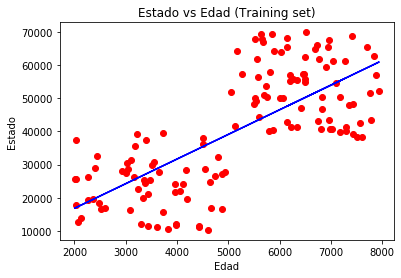

In [9]:
# Visualzamos lo datos de entrenamiento
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('Estado vs Edad (Training set)') 
plt.xlabel('Edad')
plt.ylabel('Estado')
plt.show()

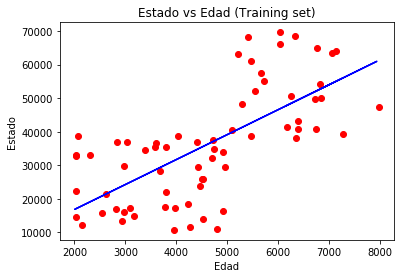

In [10]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Estado vs Edad (Training set)') 
plt.xlabel('Edad')
plt.ylabel('Estado')
plt.show()

## Validación Cruzada

In [11]:
#Importamos librerías
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 5 volúmenes:", cv_scores.mean())

Desepeño de cross-validation con 5 volúmenes: 0.4877446948950498
